<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [ ]:
import pandas as pd
import psycopg2
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [11]:
query_3_1 = f''' SELECT count(id) "Количество вакансий"
                 FROM vacancies
                '''
                
pd.read_sql_query(query_3_1, connection)

,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [12]:
query_3_2 = f''' select count(id) "Количество работодателей"
                 from employers
                 '''
                 
pd.read_sql_query(query_3_2, connection)

,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [13]:
query_3_3 = f''' select count(id) "Количество регионов"
                 from areas
                '''

pd.read_sql_query(query_3_3, connection)                

,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [14]:
query_3_4 = f''' select count(id) "Количество сфер деятельности"
                 from industries
                 '''
                 
pd.read_sql_query(query_3_4, connection)                

,Количество сфер деятельности
0,294



***

Исходя из приведенных выше запросов видно:
- общее число вакансий составляет примерно 50 тыс
- на каждого работодателя в среднем приходится чуть больше 2х вакансий
- в среднем на каждый регион(город) приходится 36 вакансий
- на каждую сферу деятельности в среднем приходится около 80 работодателей

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [15]:
query_4_1 = f''' select a.name,
                 count(v.area_id) cnt
                 from areas a join vacancies v
                 on a.id = v.area_id
                 group by a.name
                 order by 2 desc
                 limit 10                 
            '''
pd.read_sql_query(query_4_1, connection) 
          
         

,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


In [16]:
df = pd.read_sql_query(query_4_1, connection)

# Для красивого вывода создадия пустую строку temp
temp = ''
for elem in df['name']:
    temp += elem + ', '
    
print(f'Топ 5 городов по количеству вакансий: {temp[:-2]}')


Топ 5 городов по количеству вакансий: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы, Екатеринбург, Нижний Новгород, Казань, Краснодар, Самара


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [17]:
query_4_2 = f''' select count(id)
                 from vacancies
                 where salary_from is not null
                 or salary_to is not null
'''

In [18]:
df = pd.read_sql_query(query_4_2, connection)
print(f'У {df["count"][0]} количества вакансий заполнено хотя бы одно из двух полей с зарплатой')

У 24073 количества вакансий заполнено хотя бы одно из двух полей с зарплатой


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [19]:
query_4_3 = f''' select avg(salary_from) "Нижняя граница",
                        avg(salary_to) "Верхняя граница"
                 from vacancies           
'''

In [20]:
df = pd.read_sql_query(query_4_3, connection)
print(f'Нижняя граница зарплатной вилки имеет среднее значение равное {round(df["Нижняя граница"][0])},а верхняя - {round(df["Верхняя граница"][0])}')

Нижняя граница зарплатной вилки имеет среднее значение равное 71065,а верхняя - 110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [21]:
query_4_4 = f''' select schedule,
                        employment,
                        count(id)
                 from vacancies
                 group by schedule, employment
                 order by count(id) desc
                 limit 5
'''     

# Выведем первые 5 сочетаний:
pd.read_sql_query(query_4_4, connection)        

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940


In [22]:
df = pd.read_sql_query(query_4_4, connection)
print(f"На втором месте по популярности находится сочетание: {df['schedule'][1]} - {df['employment'][1]}")

На втором месте по популярности находится сочетание: Удаленная работа - Полная занятость


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [6]:
query_4_5 = f''' select experience,
                        count(id)
                 from vacancies
                 group by experience
                 order by count(id)
'''
pd.read_sql_query(query_4_5, connection)

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


In [8]:
df = pd.read_sql_query(query_4_5, connection)

# Для красивого вывода создадия пустую строку temp
temp = ''
for elem in df['experience']:
    temp += elem + ' - '
    
print(f'Порядок распредения требуемого опыта работы в зависимости от количества вакансий (по возрастанию): {temp[:-3]}')

Порядок распредения требуемого опыта работы в зависимости от количества вакансий (по возрастанию): Более 6 лет - Нет опыта - От 3 до 6 лет - От 1 года до 3 лет


***

После детального анализа данных о вакансиях можно сделать следующие выводы:
- Приблизительно у половины вакансий не указан уровень заработной платы
- Вакансии распределены по городам неравномерно: на топ-5 городов приходится порядка 30% всех вакансий
- Большиинство вакансий имеют тип занятости - полная занятость
- Чаще всего работодатели ищут соискателей с опытом работы от года до 3х лет (больше половины всех вакансий), вероятно это связано с тем, что на таких сотрудников нужно тратить минимум времени на обучение, но относительно всего рынка они "стоят" не так уж и дорого для бюджета компании

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [25]:
query_5_1 = f'''
             select e.name,
                    count(v.id)
             from vacancies v join employers e
             on v.employer_id = e.id
             group by 1
             order by 2 desc
             limit 5
             '''
 
pd.read_sql_query(query_5_1, connection)            

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


In [26]:
df = pd.read_sql_query(query_5_1, connection)['name']
print(f'На первом месте по количеству вакансий находится компания "{df[0]}", а пятое место занимает компания "{df[4]}"')


На первом месте по количеству вакансий находится компания "Яндекс", а пятое место занимает компания "Газпром нефть"


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [27]:
query_5_2 = f'''
            select  a.name,
                    count(distinct v.id) count_vacancies,
                    count(distinct e.id) count_employers      
            from areas a LEFT JOIN vacancies v
                on a.id = v.area_id
            LEFT JOIN employers e
                on a.id = e.area
            where v.id is null
            group by 1
            order by count(v.id) asc, count(e.id) desc
            limit 15
            '''

pd.read_sql_query(query_5_2, connection)

,name,count_vacancies,count_employers
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
5,Беларусь,0,18
6,Азербайджан,0,17
7,Республика Татарстан,0,16
8,Нижегородская область,0,16
9,Узбекистан,0,15


In [28]:
df = pd.read_sql_query(query_5_2, connection)
print(f'В регионе {df["name"][0]} находится наибольшее количество работодателей без вакансий')

В регионе Россия находится наибольшее количество работодателей без вакансий


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [29]:
query_5_3 = f'''
            select e.name,
                   count(distinct v.area_id)
            from employers e join vacancies v
            on v.employer_id = e.id
            group by e.name
            order by 2 desc
            limit 10
            '''
pd.read_sql_query(query_5_3, connection)

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


In [30]:
df = pd.read_sql_query(query_5_3, connection)
print(f'В {df["count"][0]} регионе представлены вакансии компании {df["name"][0]}. Это наибольшее представительство по регионам среди комнаний в текущей базе данных')

В 181 регионе представлены вакансии компании Яндекс. Это наибольшее представительство по регионам среди комнаний в текущей базе данных


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [31]:
query_5_4 = f'''select count(distinct e.id)
                from employers e left join employers_industries ei on
                e.id = ei.employer_id
                where ei.industry_id is null
            '''

In [32]:
df = pd.read_sql_query(query_5_4, connection)
print(f'Количество работодателей, у которых не указана сфера деятельности равно {df["count"][0]}')

Количество работодателей, у которых не указана сфера деятельности равно 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [33]:
query_5_5 = f'''select e.name
                from employers e join employers_industries ei on
                e.id = ei.employer_id
                group by e.name
                having count(ei.industry_id) = 4
                order by 1
            '''

pd.read_sql_query(query_5_5, connection).head()

,name
0,101 Интернет
1,21vek.by
2,2ГИС
3,2К
4,4 пикселя +


In [34]:
df = pd.read_sql_query(query_5_5, connection)
print(f'На третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности находится компания {df["name"][2]}')

На третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности находится компания 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [35]:
query_5_6 = f'''
            select count(ei.employer_id)
            from industries i  join employers_industries ei
            on i.id = ei.industry_id
            where i.name = 'Разработка программного обеспечения'
            '''

In [36]:
df = pd.read_sql_query(query_5_6, connection)
print(f'Количество работодателей, имеющий вакансии в сфере Разработка программного обеспечения равно {df["count"][0]}')

Количество работодателей, имеющий вакансии в сфере Разработка программного обеспечения равно 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [37]:
# Получаем url ссылки из задания
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
# Делаем запрос с помощью библиотеки requests
response = requests.get(url)
# Получаем html-код с помощью библиотеки BeautifulSoup
page = BeautifulSoup(response.text, 'html.parser')

# Создаем список, с которым будем рабоать, он содержит необоходимые нам города
# В my_list сохраняем все элементы с тегом <td>
my_list = list(page.find_all('td'))
million_cities = []
temp = []

# Среди элементов my_list отбираем те, которые содержат искомые нами города-миллионники
for elem in my_list:
    elem = str(elem)
    if elem.startswith('<td><a href=') and elem.endswith('</a></td>'):
        temp.append(elem)

# Извлекаем искомые нами города из полученного списка
# Пример элемента списка temp для наглядности:
# <td><a href="/wiki/%D0%95%D0%BA%DD0%BD%D0%B1%D1%83%D1%80%D0%B3" title="Екатеринбург">Екатеринбург</a></td>
for elem in temp:
    elem = str(elem.split('title="')[1])
    elem = str(elem.split('">')[0])
    million_cities.append(elem)

million_cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [38]:
# Список городов-миллионников приведем к кортежу, потому что в языке sql
# список должен быть обрамлен круглыми скобками

query_5_7 = f''' 
            with table1 as  -- Создадим переменную table1, чтобы сделать код менее объемным
            
            (select a.name,
                count(v.id) vac_count
            from vacancies v join employers e
                on v.employer_id = e.id
            join areas a on a.id = v.area_id
            where e.name = 'Яндекс' 
                and a.name in {tuple(million_cities)}
            group by 1
            order by 2)
            
            select *
            from table1
            
            union all
            
            select 'Total',
                sum(vac_count)::integer
            from table1
            '''

In [39]:
pd.read_sql_query(query_5_7, connection)

,name,vac_count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

После анализа данных о работодателях можно сделать следующие выводы:
- Компанию Яндекс можно считать локомотивом среди других компаний в этой базе данных. Она имеет больше всего вакансий, причем их количество в 5 раз больше, чем у второй по этому показателю компании. Также компания Яндекс имеет наибольшее представительтво по регионам в текущей базе данных, причем в каждом городе-миллионнике в России есть хотя бы 20 их вакансий. В целом такие данные нетрудно объяснить: что в 2021 году, что и по сей день компания Яндекс является одной из самой быстро развивающейся IT-компанией в России, так что неудивительно, что им требуется активно расширять свой штат, чтобы развивать текущие идеи, а также внедрять новые проекты.
- В рассматриваемой базе данных видно некоторая неточность, вероятно даже дублирование данных. В таблице регионов *areas* в столбце *name* намешана куча зависимых друг от друга данных: Республика Татарстан - Казань - Иннополис - Альметьевск, Россиия - Самарская область - Самара - Кинель - Новокуйбышевск. Такие данные стоило бы распределить на несколько колонок: страна/штат(регион)/город(село)
- О том, что в данных есть неточность говорит еще один факт: у трети работодателей не указана их сфера деятельности. Возможно выгрузка была проведеена некорректно и часть данных была утеряна
- Самой популярной сферой деятельности компаний является Разработка программного обеспечения. Это подтвержает некую аномальность данных: ведь самой полулярной сферой на hh.ru является сфера торговли и финансов. Вероятно данные были обработаны или изменены, специально для данного проекта

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [40]:
query_6_1 = f'''select 
                count(id)
                from vacancies
                where lower(name) like '%data%' or lower(name) like '%данн%'
                '''

In [41]:
df = pd.read_sql_query(query_6_1, connection)
print(f"Количество вакансий, в названии которых содержатся слова 'data' или 'данн', равно {df['count'][0]}")

Количество вакансий, в названии которых содержатся слова 'data' или 'данн', равно 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
query_6_2 = f'''  -- Сразу сделаем шаблон для всех DS-вакансий:

                with DS_vacancies as 

                (select name, id, experience, employment
                from vacancies
                where lower(name) like '%data scientist%' or name like 'data science'
                or lower(name) like '%исследователь данных%' or (upper(name) like '%ML%' and upper(name) not like '%HTML%')
                or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')

                select count(id)
                from DS_vacancies
                where lower(name) like '%junior%'
                or experience like '%Нет опыта%'
                or employment like '%Стажировка%'
                '''

In [43]:
df = pd.read_sql_query(query_6_2, connection)
print(f"Количество вакансий, подходящих вакансий для начинающего дата-сайентиста, равно {df['count'][0]}")

Количество вакансий, подходящих вакансий для начинающего дата-сайентиста, равно 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [44]:
query_6_3 = '''with DS_vacancies as 

                (select name, id, experience, employment, key_skills
                from vacancies
                where lower(name) like '%data scientist%' or lower(name) like '%data science%'
                or lower(name) like '%исследователь данных%' or (upper(name) like '%ML%' and upper(name) not like '%HTML%')
                or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')

                --Воспользуемся шаблоном для DS-вакансий
                select count(id)
                from DS_vacancies
                where (key_skills like '%SQL%' or key_skills like '%postgres%')
                '''

In [45]:
df = pd.read_sql_query(query_6_3, connection)
print(f"В базе данных {df['count'][0]} вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres")

В базе данных 229 вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [46]:
query_6_4 = '''
                with DS_vacancies as 

                (select name, id, experience, employment, key_skills
                from vacancies
                where (lower(name) like '%data scientist%' or lower(name) like '%data science%'
                or lower(name) like '%исследователь данных%' or (upper(name) like '%ML%' and upper(name) not like '%HTML%')
                or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')) 

                --Воспользуемся шаблоном для DS-вакансий
                select count(id)
                from DS_vacancies
                where key_skills like '%Python%'
            '''

In [47]:
df = pd.read_sql_query(query_6_4, connection)
print(f"В базе данных {df['count'][0]} вакансий для DS, в которых в качестве ключевого навыка указан Python")

В базе данных 357 вакансий для DS, в которых в качестве ключевого навыка указан Python


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [48]:
# К сожалению, при фильтах для вакансий DS из предыдущих заданий 6 юнита ответ не проходил проверку на платформе
# Поэтому пришлось сделать так, что фильтр для ML/HTML учитывал регистр, хотя ранее 
# везде использовалась конструкция upper(name)

query_6_5 = '''with DS_vacancies as 

                (select name, id, experience, employment, key_skills
                from vacancies
                where (lower(name) like '%data scientist%' or lower(name) like '%data science%'
                or lower(name) like '%исследователь данных%' or (name like '%ML%' and name not like '%HTML%')
                or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%'))
                
                -- Считаем отдельно среднне для длин строк, вычитаем из этого среднее количество табуляций
                -- в стоках и прибаляем 1, потому что навыков на 1 больше, чем самих табуляций (разделителей)
                
                select round(avg(length(key_skills)) - avg(length(replace(key_skills, CHR(9), ''))) + 1, 2)
                from DS_vacancies
                '''

In [49]:
df = pd.read_sql_query(query_6_5, connection)
print(f'{df["round"][0]} ключевых навыков в среднем указывают в вакансиях для DS')

6.41 ключевых навыков в среднем указывают в вакансиях для DS


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [50]:
query_6_6 = '''with DS_vacancies as 

                (select experience, salary_from, salary_to
                from vacancies
                where (lower(name) like '%data scientist%' or lower(name) like '%data science%'
                or lower(name) like '%исследователь данных%' or (name like '%ML%' and name not like '%HTML%')
                or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%'))
                
                -- Если одно из значений salary_to или salary_from - null, тогда их сумма также будет null
                -- Тогда функция coalesce выдаст либо salary_to, либо salary_from
                -- Если же оба эти значения null, то и при подсчете среднего мы получим null
                -- Так, например для значения experience Более 6 лет мы получили null (NaN)
                
                select  experience,
                        round(avg(coalesce((salary_from + salary_to)/2, salary_from, salary_to)))
                from DS_vacancies
                group by experience
            '''

pd.read_sql_query(query_6_6, connection)            

,experience,round
0,От 3 до 6 лет,243115.0
1,От 1 года до 3 лет,139675.0
2,Нет опыта,74643.0
3,Более 6 лет,NaN


In [51]:
df = pd.read_sql_query(query_6_6, connection)  
print(f'Дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату равную {int(df["round"][0])} рублей')

Дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату равную 243115 рублей


***

После произведенных вычислений можно сделать следующие выводы:
- Вакансий связанных с данными в текущей Базе данных - около 1800, тогда как вакансий для Дата-сайенсистов - около 500, то есть менее 30%. Из этого можно сделать вывод, что работа специалиста DS достаточно узкопрофильная и в целом компании не слишком часто нанимают сотрудников данной специализации
- В текущей выборке вакансий всего 51 - это вакансия для начинающего датасаенсиста, это примерно 10% от общего числа вакансий для DS. Исходя из этого, можно сделать вывод о том, что на рынке труда данные специалисты не слишком востребованы. И чаще всего работодатель делает выбор с пользу специалиста с больщим опытом. Это также коррелируется  с тем, что потребность компаний в найме датасайентистов невысока
- Знание языков SQL и Python - является неотъемлемый требованием при устройстве на работу специалиста DS. Об этом свидетельствует то, что вакансий с требованием SQL - около половины, а для Python - более 70%. А если откинуть данные, где не заполнены ключевые навыки (*key_skills* is null) - таких вакансий 55 штук (более 10% от всех DS-вакансий), то полученные соотношения станут куда более внушительными. Так, например, потребность в языке Python вырастет до 80%
- Очень часто в вакансих для DS не указывается уровень заработной платы (*salary_from* is null and *salary_to* is null): примерно в 85% случаев. Для сравнения: если убрать фильтр для DS и рассматривать все вакансии в данной базе данных, то соотношение будет примерно равным (то есть в половине случаев не будет указан уровень зп). Исходя из этого, а так же из выводов выше, можно утверждать, что компании не слишком часто нанимают на работу датасайентистов, поэтому уровень дохода обсуждается индивидуально с каждым соискателем на основании его ключевых навыков и опыта работы

# Дополнительные исследования

In [52]:
# Посмотрим на распределение DS-вакансий по сферам деятельности

query1 = '''select  i.name,
            count(v.id)
            from vacancies v  join employers e on v.employer_id = e.id
            join employers_industries e2 on e2.employer_id = e.id
            join industries i on i.id = e2.industry_id
            where lower(v.name) like '%data scientist%' or v.name like 'data science'
            or lower(v.name) like '%исследователь данных%' or (upper(v.name) like '%ML%' and upper(v.name) not like '%HTML%')
            or lower(v.name) like '%machine learning%' or lower(v.name) like '%машинн%обучен%'
            group by 1
            order by 2 desc          
        '''

df1 = pd.read_sql_query(query1, connection)
print(f'Общее число сфер деятельности специалистов DS составляет {df1.shape[0]}')
df1.head(10)

Общее число сфер деятельности специалистов DS составляет 104


,name,count
0,Разработка программного обеспечения,160
1,"Системная интеграция, автоматизации технологи...",153
2,Банк,89
3,"Интернет-компания (поисковики, платежные систе...",73
4,Мобильная связь,24
5,"Управляющая, инвестиционная компания (управлен...",20
6,"Маркетинговые, рекламные, BTL, дизайнерские, E...",20
7,Фиксированная связь,13
8,Консалтинговые услуги,12
9,"Научно-исследовательская, научная, академическ...",9


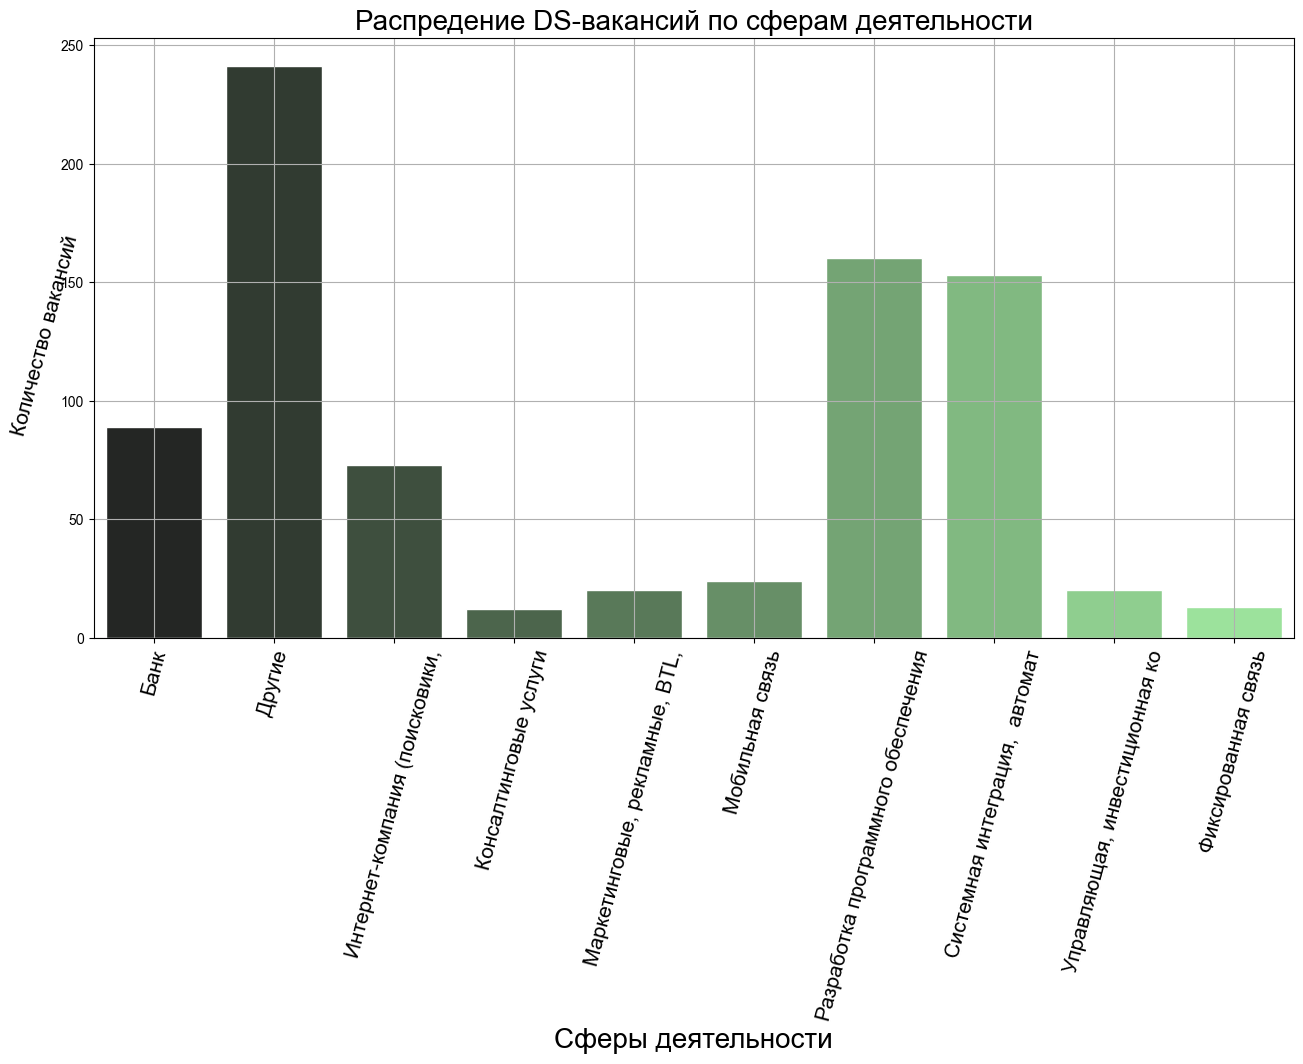

In [53]:
# Заменим непопулярные сферы на 'Другие':

popular_industries = list(df1.nlargest(9, columns='count')['name'])
df1['name'] = df1['name'].apply(lambda x: x if x in popular_industries else 'Другие')
df1['name'] = df1['name'].apply(lambda x: x[:30] if len(x)>35 else x)
df1_grouped = df1.groupby('name').sum()

# Визуализиуем получившиеся данные:

fig = plt.figure(figsize=(12, 6))
axes = fig.add_axes([0, 0, 1, 1])
sns.set_theme(style="dark")
sns.barplot(data = df1_grouped,
            x = 'name',
            y = 'count',
            hue='name',
            ax=axes,
            palette='dark:lightgreen')

axes.set_title("Распредение DS-вакансий по сферам деятельности", fontsize = 20);
axes.xaxis.set_tick_params(rotation = 75, labelsize = 15)
axes.set_xlabel('Сферы деятельности', size = 20)
axes.set_ylabel('Количество вакансий', rotation = 75, size = 15)
axes.grid();


*Всего сфер деятельности в базе данных - 294. Из них датасайентисты "засветились" в 104. Это примерно треть всех сфер деятельностей. Это может значить то, что датасайентисты востребованы практически во всех сферах: в современной мире данных становится все больше и работодатели вынуждены нанимать специалистов, способных с ними работать*

*Из графика видно, насколько велико многообразие отраслей вакансий для датасайентистов. Группа 'Другие' очень популярна. Она опережает все остальные сферы деятельности*

In [54]:
# Посмотим на зависимость среднего уровня зарплаты, от опыта работы и количества ключевых навыков
# Если ключевые навыки не укащаны, то с помощью функции coalesce проставим значение 0

query2 ='''
        select  coalesce(length(key_skills) - length(replace(key_skills, CHR(9), '')) + 1, 0) key_skills_count,
        experience,
        round(avg(coalesce((salary_from + salary_to)/2, salary_from, salary_to))) avg_salary
        from vacancies
        group by 1,2
        order by 3 desc
        '''

df2 = pd.read_sql_query(query2, connection)
df2.tail()

,key_skills_count,experience,avg_salary
116,1,Нет опыта,41230.0
117,18,Нет опыта,35700.0
118,27,Нет опыта,35500.0
119,30,Нет опыта,33000.0
120,0,Нет опыта,30055.0


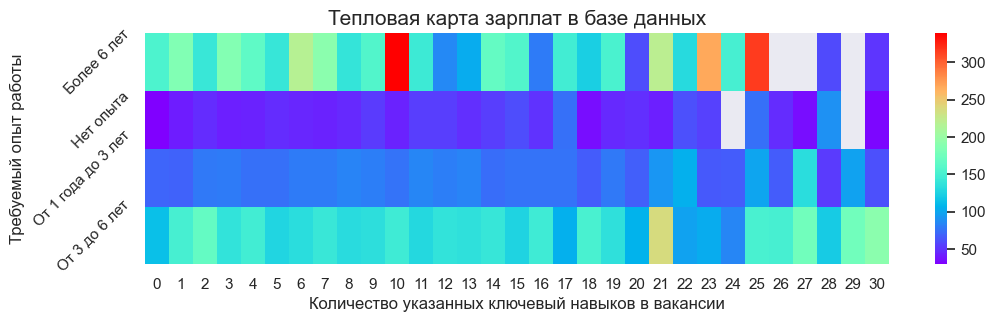

In [55]:
# Составим тепловую карту зарплат:

pivot = pd.pivot_table(data=df2,
                    values='avg_salary',
                    index ='experience',
                    columns='key_skills_count',
                    aggfunc='mean')

# Выведим зп в тысячах рублей:
pivot = pivot/1000
pivot = pivot.apply(lambda x: round(x,2))
fig = plt.figure(figsize=(12, 3))

heatmap_pivot = sns.heatmap(data=pivot, cmap='rainbow')
heatmap_pivot.set_title('Тепловая карта зарплат в базе данных', fontsize=15)
heatmap_pivot.yaxis.set_tick_params(rotation=45)
heatmap_pivot.set_xlabel('Количество указанных ключевый навыков в вакансии')
heatmap_pivot.set_ylabel('Требуемый опыт работы');

*Из графика четко просматривается зависимость уровня зарплат от опыта работы: чем больше опыта - тем выше зп. Однако явной зависимости уровня зп от количества ключевых навыков не прослеживается. Тем не менее видно, что отсутствие ключевых навыков негативно сказывается на уровне дохода соискателя - по каждой катерогии опыта работы он минимален. У соискателей, чей опыт менее 6 лет виден небольшой рост заработной платы при росте количества ключевых навыков. Однако у соискателей с опытом более 6 лет картина совсем аномальная: количество ключевых навыков скорее играет во вред таким соискателям. Это можно объяснить малой выборкой данных, поскольку в данной категории наблюдается больше всего пропущенных значений, а также наименьшее число самих вакансий*

# Общий вывод по проекту

In [56]:
# Выведем топ 15 городов по количеству вакансий:

query3 = '''select a.name "Город",
            count(v.id) "Число вакансий"
            from vacancies v join areas a
            on v.area_id = a.id
            group by 1
            order by 2 desc
            limit 15
        '''
        
pd.read_sql_query(query3, connection)

,Город,Число вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


- *Из последнего запроса видно, что количество вакансий в городе пропорционально количеству населения города. То есть не наблюдается явного перекоса (аномалий) в данных. Также в таблице присутствуют города не только из России, но а также из стран СНГ. Это показывает международный охват данных, правда с явным перекосом на людей, говорящих на русском языке.*

- *Однако топ-1 сфера труда является "Разработка программного обеспечения". Это не самая популярная сфера труда в 2025 году, чего уж говорить про 2021. Это наталкивает на мысль, что данные не были подобраны случайным образом, вероятно были применены некие критерий отбора при выгрузке данных.*

- *Достаточно много вакансий не содержит данные о зарплате, это несколько затрудняет анализ данных. Стоило бы создать некоторый алгоритм, который будет предсказывать уровень зп в вакансии в зависимости от города, требуемого опыта работы, ключевых навыков и типа рабочего графика.*